# Pricing an option
Here we will construct a lazy pricer for a vanilla european option

In [1]:
import numpy as np
import sympy as sy
from sympy.stats import Normal as syNormal, cdf
sy.init_printing()

In [2]:
# adapted from https://gist.github.com/raddy/bd0e977dc8437a4f8276
#spot, strike, vol, days till expiry, interest rate, call or put (1,-1)
spot, strike, vol, dte, rate, cp = sy.symbols('spot strike vol dte rate cp')

T = dte / 260.
N = syNormal('N', 0.0, 1.0)

d1 = (sy.ln(spot / strike) + (0.5 * vol ** 2) * T) / (vol * sy.sqrt(T))
d2 = d1 - vol * sy.sqrt(T)

tv = sy.exp(-rate * T) * (cp * spot * cdf(N)(cp * d1) - cp * strike  * cdf(N)(cp * d2))

bs_tv = sy.lambdify((spot, strike, vol, dte, rate, cp), tv)

Let's take a look at the sympy expression

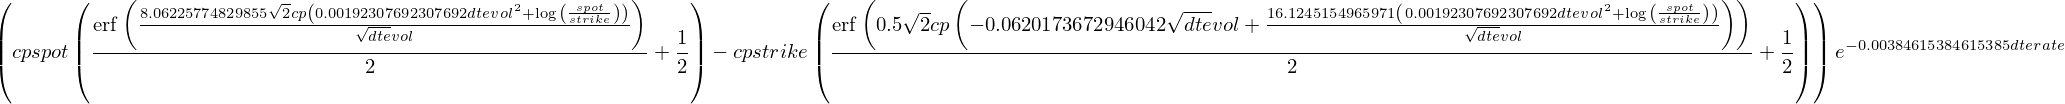

In [3]:
tv

## Construct lazy grapy
Now using `tributary`, we construct a lazily-evaluated graph

In [4]:
import tributary.symbolic as ts
clazz = ts.construct_lazy(tv)

In [5]:
l = clazz(spot=210.59, strike=205, vol=14.04, dte=4, rate=.2175, cp=-1)

In [6]:
l.evaluate()()

In [7]:
l.strike = 210
l.evaluate()()

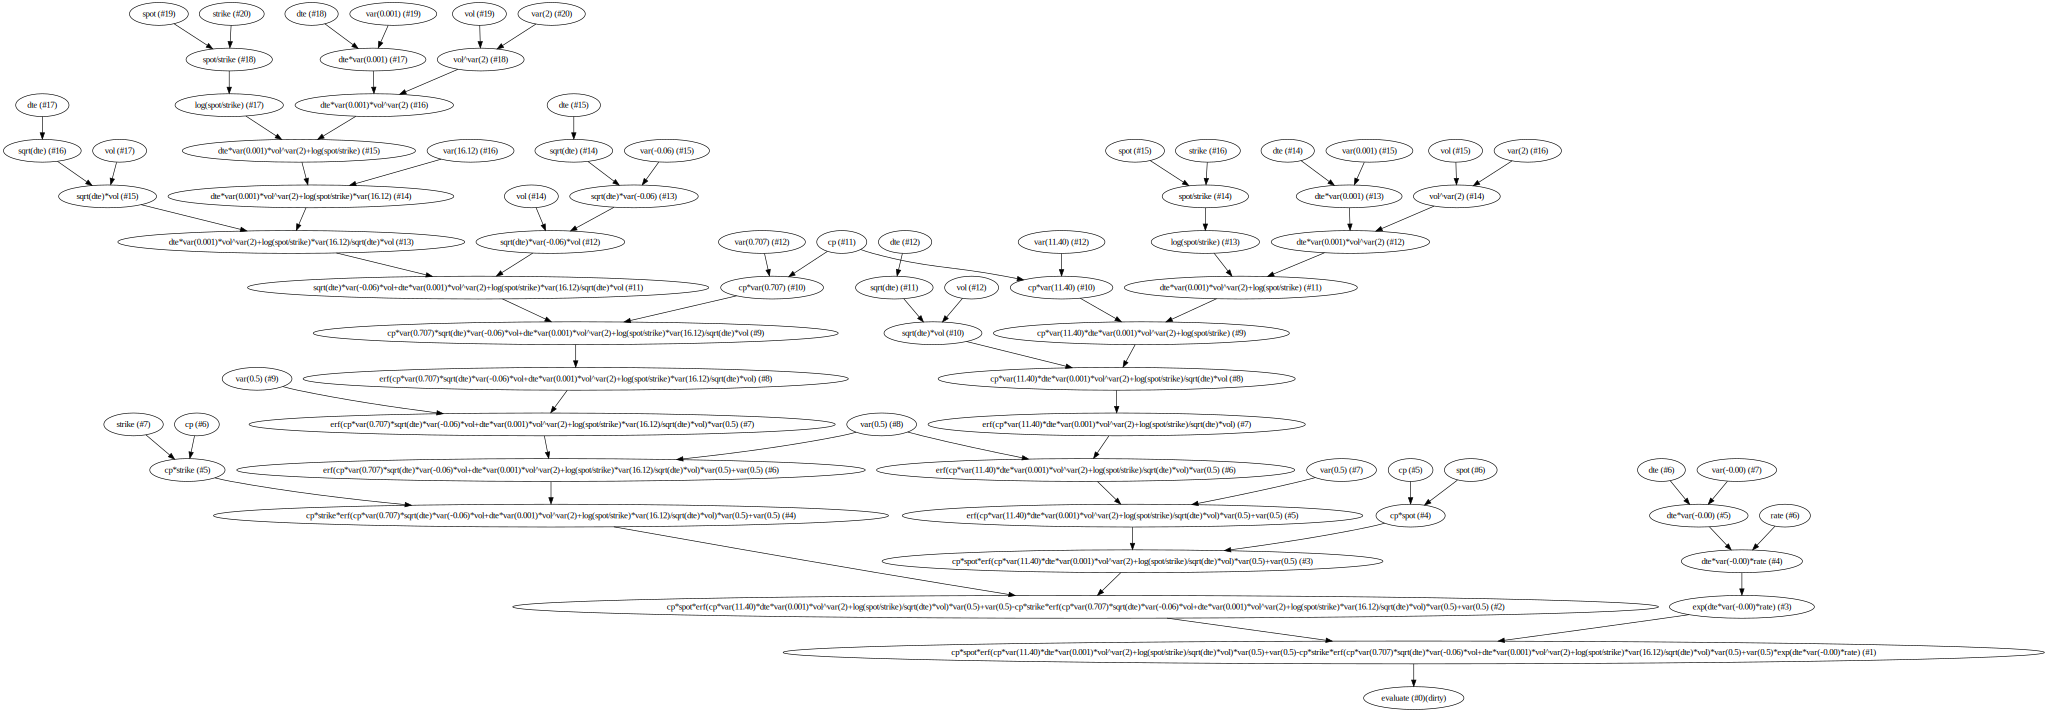

In [8]:
l.evaluate().graphviz()

## Visualizing the dirty nodes
If we adjust an input, we can see the nodes that will be recalculated on next evaluation

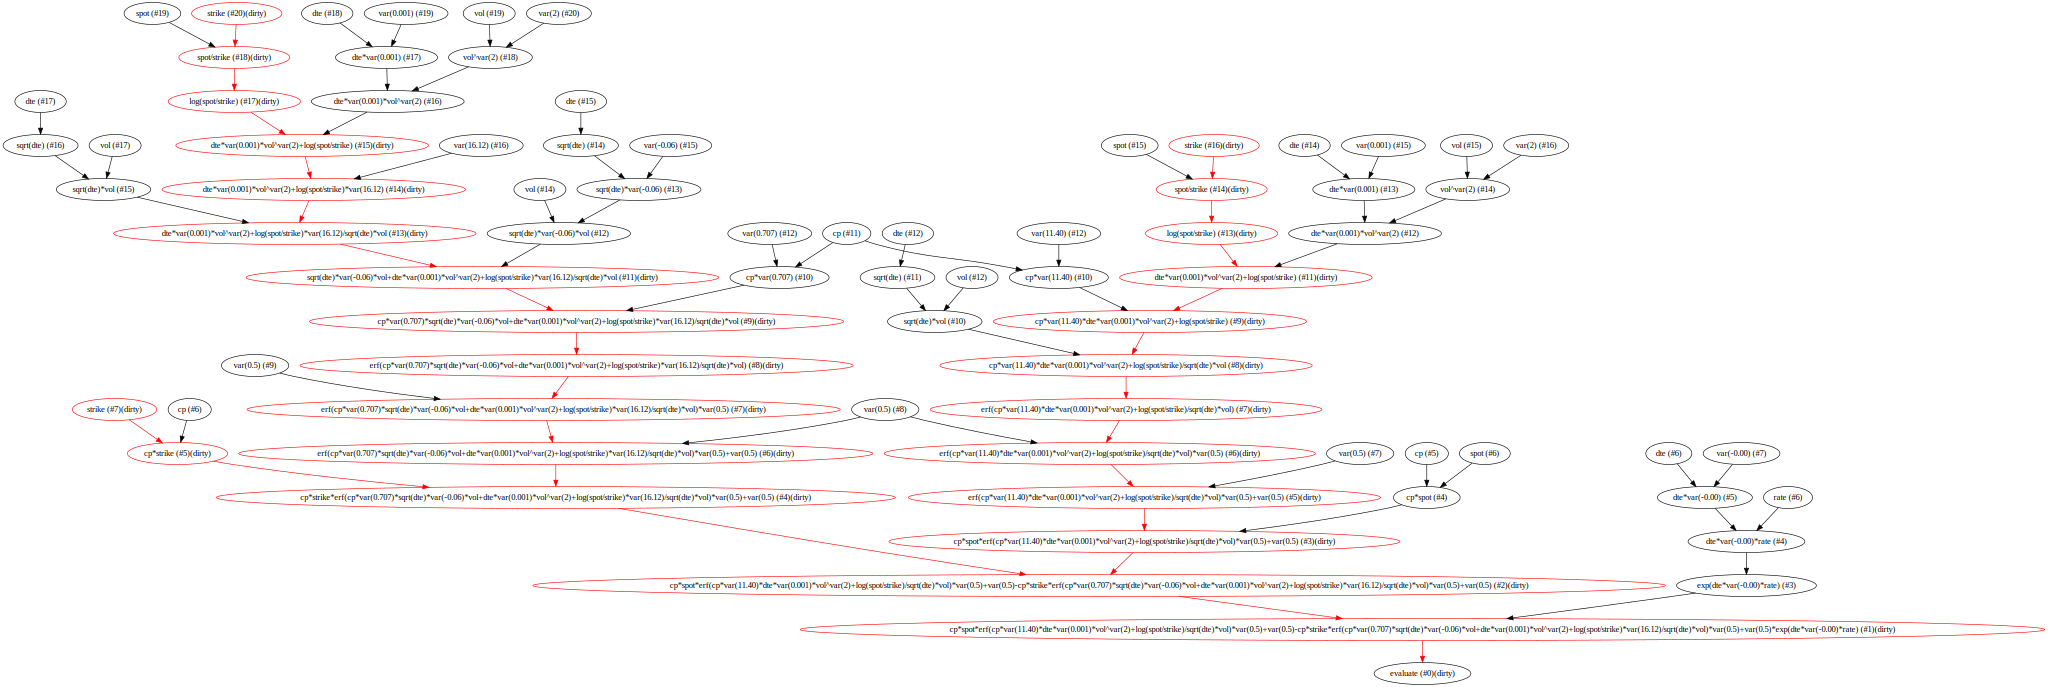

In [9]:
l.strike = 205
l.evaluate().graphviz()

# Lazy Greeks
(work in progress)

In [12]:
# #1st Order Greeks
# delta = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S))
# vega = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(vol)/100.) #WATCH UNITS
# theta = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(dte))
# rho = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(r))

# #2nd Order Greeks
# gamma = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,S))
# vanna = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,vol)/100.)
# vomma = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(vol,vol)/1e4) #IN TICKS
# charm = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,dte)) #DELTA DECAY

# #3rd Order -- Who cares about anything about dGamma?
# speed = sy.lambdify((S, K, vol, dte, r,cp),tv.diff(S,3))